In [1]:
# importing the required modules
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 128
BATCH_SIZE = 8

In [3]:
# importing the dataset(i,e all the images from directory)
dataset = tf.keras.preprocessing.image_dataset_from_directory(
r"C:\arecanut-diseases-detection\arecanut_dataset\Arecanut_dataset\Arecanut_dataset\train",
shuffle=True,
# image_size = (IMAGE_SIZE,IMAGE_SIZE),
batch_size = BATCH_SIZE
)

Found 8853 files belonging to 10 classes.


In [4]:
#create a variable and assign all our image folders into it
class_names = dataset.class_names #folder name are our class name
class_names

['Healthy_Leaf',
 'Healthy_Nut',
 'Healthy_Trunk',
 'Mahali_Koleroga',
 'Stem_bleeding',
 'boron_deficiency',
 'bud borer',
 'healthy_foot',
 'stem cracking',
 'yellow leaf disease']

In [5]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())

(8, 256, 256, 3)
[0 3 1 2 1 0 1 2]


In [6]:
len(dataset)

1107

In [7]:
dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [8]:
#explore the dataset
#dataset.take(1) takes the first one sample
#dataset.take(10) takes the first ten sample
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0]) # get the first image data in tensor

#image_batch: Represents a batch of images from the dataset.
#label_batch: Corresponds to the labels associated with the images in the batch.
#The printed statement (print(image_batch[0])) outputs the data tensor of the first image in the batch

tf.Tensor(
[[[ 92.953125  140.89453    67.01172  ]
  [ 92.44922   141.44922    59.57422  ]
  [101.66016   151.66016    62.660156 ]
  ...
  [144.53906   164.66406    31.914062 ]
  [ 73.43359    92.68359     4.703125 ]
  [ 19.148438   41.464844    4.1796875]]

 [[ 88.16016   134.16016    59.160156 ]
  [ 88.30859   135.3086     54.898438 ]
  [ 85.61328   133.02344    50.91797  ]
  ...
  [126.82031   146.07031    18.757812 ]
  [ 87.12891   107.37891    11.996094 ]
  [ 36.83203    59.83203    16.769531 ]]

 [[109.21875   152.21875    73.       ]
  [113.6875    156.6875     77.6875   ]
  [121.07422   164.07422    85.07422  ]
  ...
  [139.07812   157.30078    37.640625 ]
  [ 85.86719   107.11719     7.3828125]
  [ 32.5625     56.5625      8.5625   ]]

 ...

 [[193.16797   238.16797   205.16797  ]
  [198.6836    243.6836    210.6836   ]
  [197.52734   242.02734   209.15234  ]
  ...
  [119.43359   180.4336    113.18359  ]
  [117.19141   178.1914    109.19141  ]
  [119.3125    180.53125   109.87

In [9]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())# convert tensor into numpy
    #3D matrix array

[[[1.74847656e+02 1.45632812e+02 1.58085938e+01]
  [1.77992188e+02 1.41992188e+02 4.98046875e+00]
  [1.91527344e+02 1.53652344e+02 1.08632812e+01]
  ...
  [1.40691406e+02 1.54316406e+02 1.57441406e+02]
  [1.81269531e+02 1.90269531e+02 1.99269531e+02]
  [9.42773438e+01 1.00277344e+02 1.12277344e+02]]

 [[1.67113281e+02 1.41527344e+02 1.41406250e+01]
  [1.84257812e+02 1.52390625e+02 1.66367188e+01]
  [1.67000000e+02 1.32710938e+02 2.05859375e+00]
  ...
  [5.60429688e+01 6.87929688e+01 7.65429688e+01]
  [8.89062500e+01 9.69062500e+01 1.07906250e+02]
  [1.25167969e+02 1.31167969e+02 1.45167969e+02]]

 [[1.43621094e+02 1.20839844e+02 6.30078125e+00]
  [2.01531250e+02 1.73394531e+02 4.97109375e+01]
  [1.96429688e+02 1.66363281e+02 3.71875000e+01]
  ...
  [1.05832031e+02 1.18457031e+02 1.27484375e+02]
  [1.18027344e+02 1.26027344e+02 1.39027344e+02]
  [7.91210938e+01 8.41210938e+01 1.03121094e+02]]

 ...

 [[4.22734375e+01 3.67343750e+01 0.00000000e+00]
  [6.39570312e+01 4.86171875e+01 8.7890

In [10]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)#get the shape of the dataset

# 256, 256 is our image size and 3 is channel
CHANNELS = 3

(256, 256, 3)


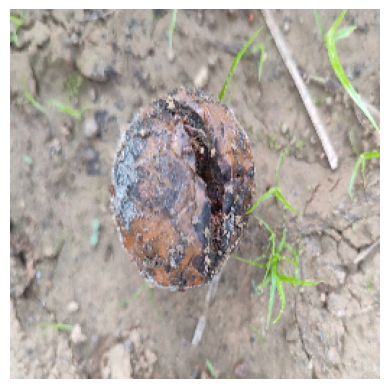

In [13]:
#visualization of data
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    # plt.imshow is used to visualize the image
    #convert the image_bacth from tensor to numpy for visualzation
    # and convert it into float to int
    #randomly selecting the images
    plt.axis("off") # hide x and y-axis

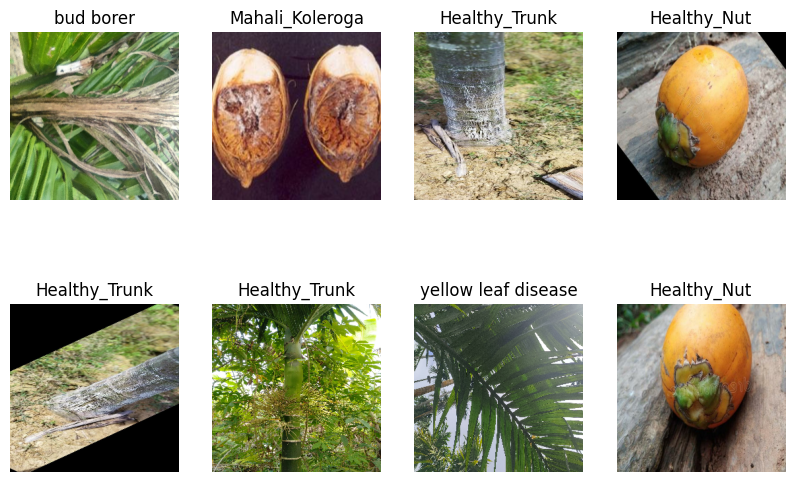

In [14]:
#visualization of data
 #increase the size of the images
plt.figure(figsize=(10,10))

for image_batch, label_batch in dataset.take(1):
    for i in range(len(image_batch)): # displaying the 12 images
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])# assigning the title by using index no. of the dataset
        plt.axis("off") # hide x and y-axis
        


In [15]:
len(dataset)

1107

In [16]:
68*32 # 32 because each data is of 32 batch

2176

In [17]:
# split the data into train and test
# 80% for training 
# 20 % for testing(in which 10 % for validation, 10% for test )
# validation is used during the training process when we run epochs

#lets try with 50 epochs
EPOCHS = 30

In [18]:
train_size = 0.8
len(dataset) * train_size


885.6

In [19]:
#dataset.take(54) takes the first 54 sample
train_ds = dataset.take(54)
len(train_ds)

54

In [20]:
test_ds = dataset.skip(54) # skipping the first 54 dataset and getting the next 54 dataset
len(test_ds)

1053

In [21]:
#  10 % for validation
val_size = 0.1
len(dataset) * val_size

110.7

In [22]:
test_ds = test_ds.skip(6)
len(test_ds) #actual test dataset

1047

In [23]:
# putting all the above code in a proper function
def get_dataset_partitions_tf(ds,train_split = 0.8, val_split = 0.1, test_split = 0.1,shuffle = True, shuffle_size = 10000):
    ds_size = len(ds)
    if shuffle:
        #randomly shuffling the datset 
        ds = ds.shuffle(shuffle_size, seed = 12) #seed is because we should not get same images, seed may be anynumber
        
        train_size = int(train_split * ds_size) #convert into integer
        val_size = int(val_split *  ds_size)
        
        train_ds = ds.take(train_size)
        
        val_ds = ds.skip(train_size).take(val_size) # first skip and then take the dataset
        test_ds = ds.skip(train_size).take(val_size)
        
        return train_ds, val_ds, test_ds
        

In [24]:
train_ds, val_ds, test_ds =  get_dataset_partitions_tf(dataset)
len(train_ds)


885

In [25]:
len(val_ds)

110

In [26]:
len(test_ds)

110

In [27]:
# train dataset = train_ds
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE) # first it will read the image from the disk and stores in the memory
# prefetch will load next batch of the images, when current batch is bussy

#validation dataset = val_ds
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE) # first it will read the image from the disk and stores in the memory
#test dataset = test_ds
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE) # first it will read the image from the disk and stores in the memory


In [28]:
import tensorflow as tf

IMAGE_SIZE = 224  # example size, use your value

resizing_and_rescaling = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.Rescaling(1.0/255)
])

In [29]:
data_augumentation =  tf.keras.Sequential([
    # concert the image into horizontal and vertical (landsacpe and portrait )
     tf.keras.layers.RandomFlip("horizontal_and_vertical"),
     tf.keras.layers.RandomRotation(0.2),
])

In [30]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [31]:
#Model Building CNN
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 10 # our no. of classes(folders) are three

model = models.Sequential([
    resizing_and_rescaling, # first resizing_and_rescaling
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    
     # trial and error with neurons 32 and 64
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
     #after pooling we should do flatten the model
    layers.Flatten(),
    
      #adding dense layer of 64 neurons
    layers.Dense(64, activation='relu'),
    
    #     normalize the classes
    # softmax normalize the probability of the classes
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

c:\arecanut-diseases-detection\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (8, 224, 224, 3)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (8, 222, 222, 32)      │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (8, 111, 111, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (8, 109, 109, 64)      │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (8, 54, 54, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (8, 52, 52, 64)        │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (8, 26, 26, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (8, 24, 24, 64)        │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (8, 12, 12, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (8, 10, 10, 64)        │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (8, 5, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (8, 3, 3, 64)          │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (8, 1, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (8, 64)                │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (8, 64)                │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (8, 10)                │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 171,914 (671.54 KB)

 Trainable params: 171,914 (671.54 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
from keras import utils as np_utils

In [34]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [35]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=30,
)
# here we get the validation accuracy and accuracy of the model at each train
# accuracy will be keep on increasing as we train

Epoch 1/30
885/885 ━━━━━━━━━━━━━━━━━━━━ 100s 92ms/step - accuracy: 0.5266 - loss: 1.2340 - val_accuracy: 0.6807 - val_loss: 0.8608
Epoch 2/30
885/885 ━━━━━━━━━━━━━━━━━━━━ 64s 73ms/step - accuracy: 0.6606 - loss: 0.9068 - val_accuracy: 0.7080 - val_loss: 0.7640
Epoch 3/30
885/885 ━━━━━━━━━━━━━━━━━━━━ 56s 63ms/step - accuracy: 0.7209 - loss: 0.7359 - val_accuracy: 0.8034 - val_loss: 0.5744
Epoch 4/30
885/885 ━━━━━━━━━━━━━━━━━━━━ 55s 62ms/step - accuracy: 0.7746 - loss: 0.6137 - val_accuracy: 0.7977 - val_loss: 0.5482
Epoch 5/30
885/885 ━━━━━━━━━━━━━━━━━━━━ 55s 62ms/step - accuracy: 0.8235 - loss: 0.4878 - val_accuracy: 0.8716 - val_loss: 0.3447
Epoch 6/30
885/885 ━━━━━━━━━━━━━━━━━━━━ 55s 62ms/step - accuracy: 0.8687 - loss: 0.3587 - val_accuracy: 0.8761 - val_loss: 0.2849
Epoch 7/30
885/885 ━━━━━━━━━━━━━━━━━━━━ 55s 63ms/step - accuracy: 0.8830 - loss: 0.3227 - val_accuracy: 0.9182 - val_loss: 0.2467
Epoch 8/30
885/885 ━━━━━━━━━━━━━━━━━━━━ 55s 62ms/step - accuracy: 0.9168 - loss: 0.2444 -

In [ ]:
#  model compling using optimizer, loss and metrics
# model.compile(
#     optimizer = 'adam',
#      loss = tf.keras.utils.np_utils.to_categorical(from_logits = False),
#     loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
#     metrics = ['accuracy']
# )

In [ ]:
# history = model.fit(
#     train_ds,
#     epochs = EPOCHS,
#     batch_size = BATCH_SIZE,
#     verbose = 1,
#     validation_data = val_ds
# )

In [36]:
score = model.evaluate(test_ds)
score

110/110 ━━━━━━━━━━━━━━━━━━━━ 33s 34ms/step - accuracy: 0.9648 - loss: 0.1340


[0.13404536247253418, 0.9647727012634277]

In [37]:
history

In [38]:
history.params # parameters

{'verbose': 1, 'epochs': 30, 'steps': 885}

In [39]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [40]:
history.history['accuracy']

[0.5266355872154236,
 0.660590648651123,
 0.7209269404411316,
 0.7746220231056213,
 0.8235127925872803,
 0.8687297105789185,
 0.8830012679100037,
 0.9167726635932922,
 0.9224247336387634,
 0.9331637620925903,
 0.9455984234809875,
 0.9516744613647461,
 0.9581743478775024,
 0.9588809013366699,
 0.9577504396438599,
 0.9704676866531372,
 0.9663699269294739,
 0.969902515411377,
 0.9792284965515137,
 0.9690546989440918,
 0.972869873046875,
 0.977674126625061,
 0.9765437245368958,
 0.9751306772232056,
 0.981489360332489,
 0.9740002751350403,
 0.983326256275177,
 0.9792284965515137,
 0.9789458513259888,
 0.9788045883178711]

In [41]:
len(history.history['accuracy'])

30

In [42]:
# visualize the train and accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

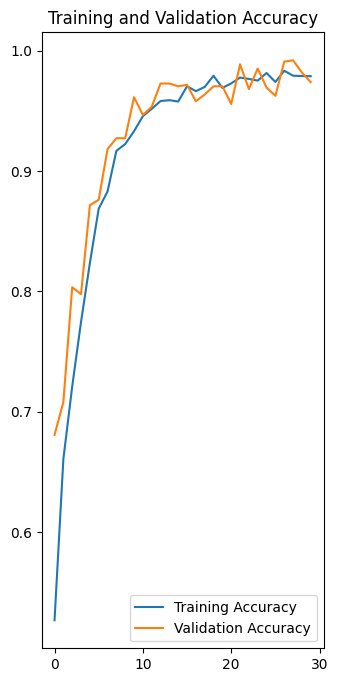

In [43]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(len(acc)), acc, label='Training Accuracy')
plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#graphs shows the increase in accuracy

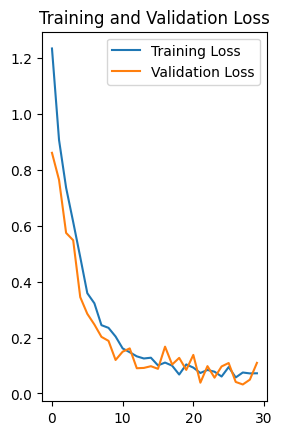

In [44]:
plt.subplot(1, 2, 2)
plt.plot(range(len(loss)), loss, label='Training Loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
# graphs shows the loss

first image to predict
actual label: Mahali_Koleroga
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
predicted label: Mahali_Koleroga


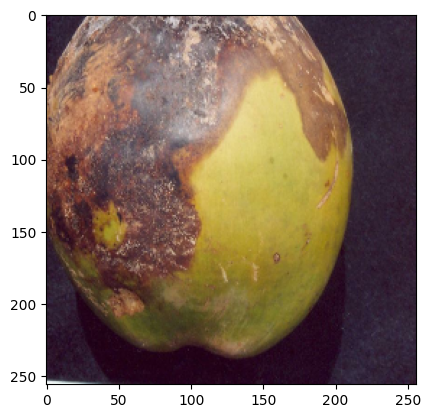

In [45]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [46]:
# function which takes model and image as input and tells predict class and confidence
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


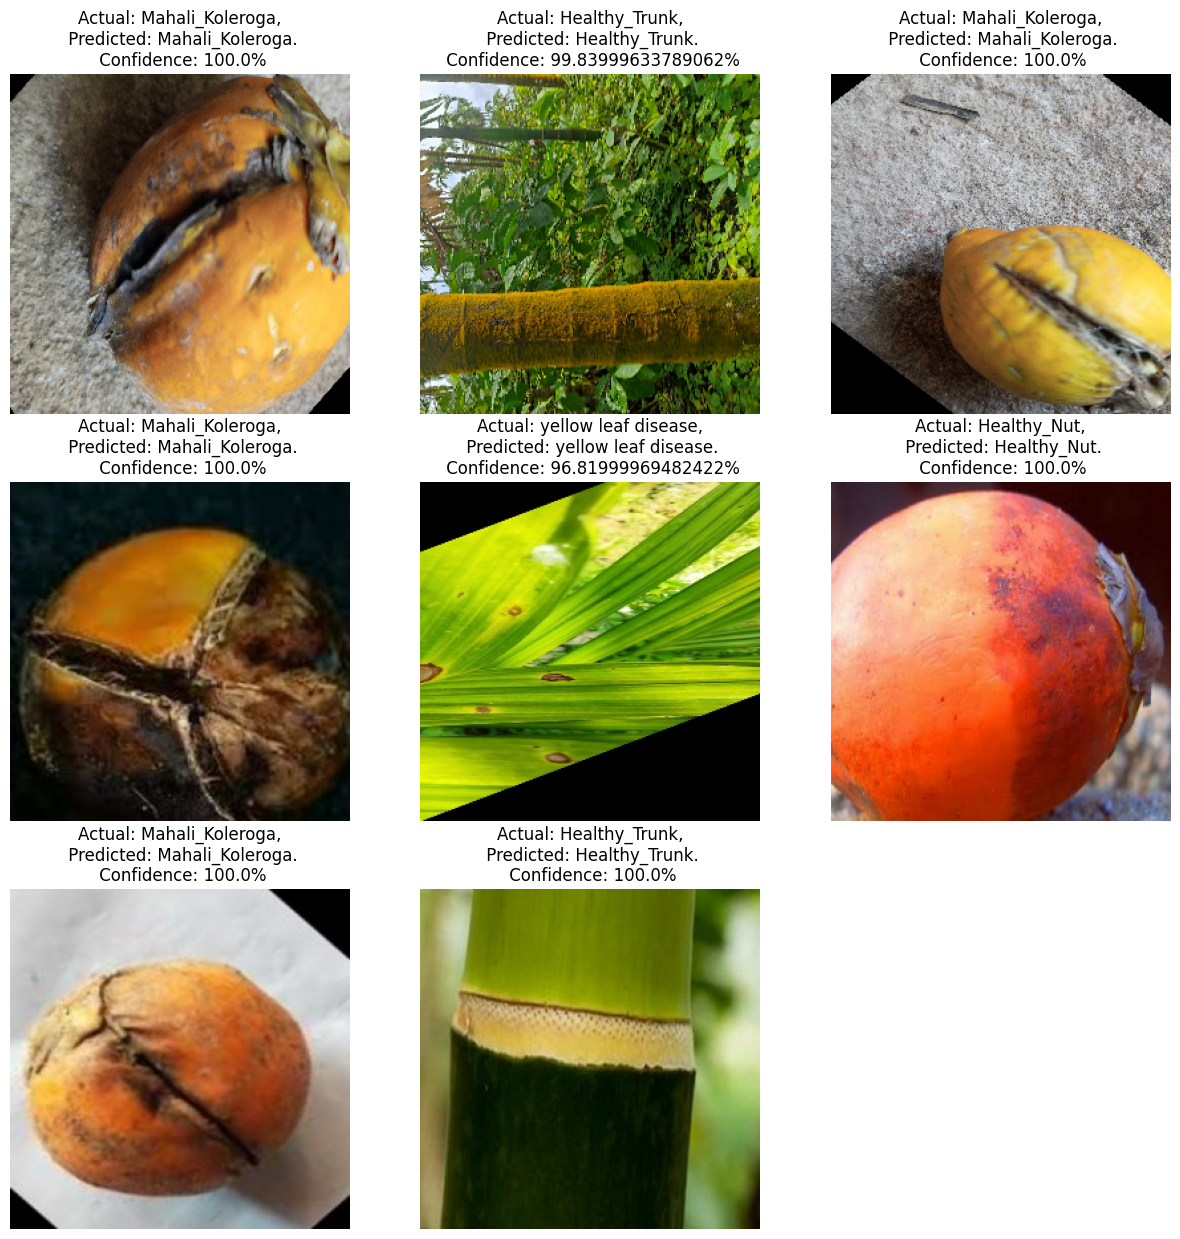

In [47]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(len(image_batch)):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [50]:
# Save model as .keras file
model.save("arecanut_model.keras")
print("✅ Model saved as arecanut_model.keras")
print(f"✅ Model saved at: {save_path}")

✅ Model saved as arecanut_model.keras
✅ Model saved at: c:\arecanut-disease-detection\models\1


In [51]:
from tensorflow import keras

# Load model
model = keras.models.load_model("arecanut_model.keras")
print("✅ Model loaded successfully")

✅ Model loaded successfully
